In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import bisect
import seaborn as sns
import LCDMSphere
import Energy_loss_class
import Source_class
import IGM

In [2]:
IGM_00 = IGM.IGM_N(0, 0)
N_00, P_00, P_00_eV = IGM_00.get_P()

In [31]:
print(np.where(IGM_00.z > 4.9))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71]),)


In [29]:
print(IGM_00.z[198])
print(IGM_00.z[148])
print(IGM_00.z[120])
print(IGM_00.z[99])
print(IGM_00.z[83])
print(IGM_00.z[70])
print(IGM_00.z[59])

0.007015058871677082
1.0210575217455433
1.985400432479345
3.000097059156471
3.9990121950450117
4.991634331908876
5.984007492817492


In [3]:
E2N_z0 = np.zeros((IGM.mstep,))
for i in range(IGM.mstep):
    E2N_z0[i] = IGM.E[i]**2 * N_00[i][198]/1.602e-12
    
E2N_z1 = np.zeros((IGM.mstep,))
for i in range(IGM.mstep):
    E2N_z1[i] = IGM.E[i]**2 * N_00[i][148]/1.602e-12
    
E2N_z2 = np.zeros((IGM.mstep,))
for i in range(IGM.mstep):
    E2N_z2[i] = IGM.E[i]**2 * N_00[i][120]/1.602e-12
    
E2N_z3 = np.zeros((IGM.mstep,))
for i in range(IGM.mstep):
    E2N_z3[i] = IGM.E[i]**2 * N_00[i][99]/1.602e-12
    
E2N_z4 = np.zeros((IGM.mstep,))
for i in range(IGM.mstep):
    E2N_z4[i] = IGM.E[i]**2 * N_00[i][83]/1.602e-12
    
E2N_z5 = np.zeros((IGM.mstep,))
for i in range(IGM.mstep):
    E2N_z5[i] = IGM.E[i]**2 * N_00[i][70]/1.602e-12
    
E2N_z6 = np.zeros((IGM.mstep,))
for i in range(IGM.mstep):
    E2N_z6[i] = IGM.E[i]**2 * N_00[i][59]/1.602e-12

In [64]:
print(np.where(E2N_z6==max(E2N_z6)))
print(IGM.E_mid[68]/1.602e-12/1e6) # 0
print(IGM.E_mid[69]/1.602e-12/1e6) # 1 2 3 4 5 6

(array([69]),)
0.32856756746315985
0.34813711068607583


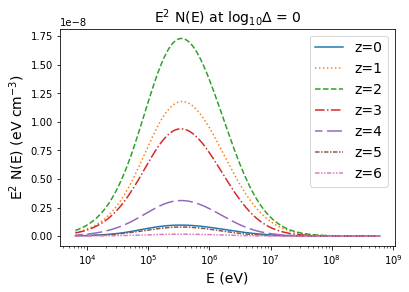

In [4]:
plt.plot(IGM.E_mid/1.602e-12, E2N_z0, '-', label = 'z=0')
plt.plot(IGM.E_mid/1.602e-12, E2N_z1, ':', label = 'z=1')
plt.plot(IGM.E_mid/1.602e-12, E2N_z2, '--', label = 'z=2')
plt.plot(IGM.E_mid/1.602e-12, E2N_z3, '-.', label = 'z=3')
plt.plot(IGM.E_mid/1.602e-12, E2N_z4, linestyle=(5, (10, 3)), label = 'z=4')
plt.plot(IGM.E_mid/1.602e-12, E2N_z5, linestyle=(0, (3, 1, 1, 1)), label = 'z=5')
plt.plot(IGM.E_mid/1.602e-12, E2N_z6, linestyle=(0, (3, 1, 1, 1, 1, 1)), label = 'z=6')
plt.xscale('log')
plt.legend(fontsize = 14, loc = 'upper right')
plt.title('$\mathrm{E^2\ N(E)}$ at $\mathrm{log_{10}}\Delta$ = 0', fontsize = 14)
plt.xlabel('E (eV)', fontsize = 14)
plt.ylabel('$\mathrm{E^2\ N(E)\ (eV\ cm^{-3}})$', fontsize = 14)
plt.savefig('NE_diffz.pdf')
plt.show()

In [5]:
IGM_01 = IGM.IGM_N(0, 1)
N_01, P_01, P_01_eV = IGM_01.get_P()

In [6]:
E2N_z0 = np.zeros((IGM.mstep,))
for i in range(IGM.mstep):
    E2N_z0[i] = IGM.E[i]**2 * N_01[i][198]
    
E2N_z1 = np.zeros((IGM.mstep,))
for i in range(IGM.mstep):
    E2N_z1[i] = IGM.E[i]**2 * N_01[i][148]
    
E2N_z2 = np.zeros((IGM.mstep,))
for i in range(IGM.mstep):
    E2N_z2[i] = IGM.E[i]**2 * N_01[i][120]
    
E2N_z3 = np.zeros((IGM.mstep,))
for i in range(IGM.mstep):
    E2N_z3[i] = IGM.E[i]**2 * N_01[i][99]
    
E2N_z4 = np.zeros((IGM.mstep,))
for i in range(IGM.mstep):
    E2N_z4[i] = IGM.E[i]**2 * N_01[i][83]
    
E2N_z5 = np.zeros((IGM.mstep,))
for i in range(IGM.mstep):
    E2N_z5[i] = IGM.E[i]**2 * N_01[i][70]
    
E2N_z6 = np.zeros((IGM.mstep,))
for i in range(IGM.mstep):
    E2N_z6[i] = IGM.E[i]**2 * N_01[i][59]

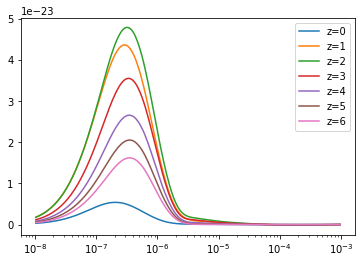

In [44]:
plt.plot(IGM.E_mid, E2N_z0, label = 'z=0')
plt.plot(IGM.E_mid, E2N_z1, label = 'z=1')
plt.plot(IGM.E_mid, E2N_z2, label = 'z=2')
plt.plot(IGM.E_mid, E2N_z3, label = 'z=3')
plt.plot(IGM.E_mid, E2N_z4, label = 'z=4')
plt.plot(IGM.E_mid, E2N_z5, label = 'z=5')
plt.plot(IGM.E_mid, E2N_z6, label = 'z=6')
plt.xscale('log')
plt.legend(loc = 'upper right')

In [7]:
IGM_neg10 = IGM.IGM_N(-1, 0)
N_neg10, P_neg10, P_neg10_eV = IGM_neg10.get_P()

IGM_neg50 = IGM.IGM_N(-0.5, 0)
N_neg50, P_neg50, P_neg50_eV = IGM_neg50.get_P()

IGM_50 = IGM.IGM_N(0.5, 0)
N_50, P_50, P_50_eV = IGM_50.get_P()

IGM_10 = IGM.IGM_N(1, 0)
N_10, P_10, P_10_eV = IGM_10.get_P()

In [8]:
E2N_00 = np.zeros((IGM.mstep,))
for i in range(IGM.mstep):
    E2N_00[i] = IGM.E[i]**2 * N_00[i][120]/1.602e-12
    
E2N_neg10 = np.zeros((IGM.mstep,))
for i in range(IGM.mstep):
    E2N_neg10[i] = IGM.E[i]**2 * N_neg10[i][120]/1.602e-12
    
E2N_neg50 = np.zeros((IGM.mstep,))
for i in range(IGM.mstep):
    E2N_neg50[i] = IGM.E[i]**2 * N_neg50[i][120]/1.602e-12
    
E2N_50 = np.zeros((IGM.mstep,))
for i in range(IGM.mstep):
    E2N_50[i] = IGM.E[i]**2 * N_50[i][120]/1.602e-12
    
E2N_10 = np.zeros((IGM.mstep,))
for i in range(IGM.mstep):
    E2N_10[i] = IGM.E[i]**2 * N_10[i][120]/1.602e-12

In [55]:
print(np.where(E2N_10==max(E2N_10)))
print(IGM.E_mid[69]/1.602e-12/1e6) # 0
print(IGM.E_mid[67]/1.602e-12/1e6) # -1
print(IGM.E_mid[68]/1.602e-12/1e6) # -0.5
print(IGM.E_mid[70]/1.602e-12/1e6) # 0.5
print(IGM.E_mid[71]/1.602e-12/1e6) # 1

(array([71]),)
0.34813711068607583
0.3100980707742053
0.32856756746315985
0.3688722194117297
0.3908423149304244


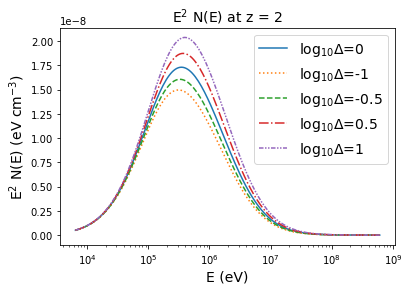

In [9]:
plt.plot(IGM.E_mid/1.602e-12, E2N_00, '-', label = '$\mathrm{log_{10}}\Delta$=0')
plt.plot(IGM.E_mid/1.602e-12, E2N_neg10, ':', label = '$\mathrm{log_{10}}\Delta$=-1')
plt.plot(IGM.E_mid/1.602e-12, E2N_neg50, '--', label = '$\mathrm{log_{10}}\Delta$=-0.5')
plt.plot(IGM.E_mid/1.602e-12, E2N_50, '-.', label = '$\mathrm{log_{10}}\Delta$=0.5')
plt.plot(IGM.E_mid/1.602e-12, E2N_10, linestyle = (0, (3, 1, 1, 1, 1, 1)), label = '$\mathrm{log_{10}}\Delta$=1')
plt.xscale('log')
plt.legend(loc = 'upper right', fontsize = 14)
plt.title('$\mathrm{E^2\ N(E)}$ at z = 2', fontsize = 14)
plt.xlabel('E (eV)', fontsize = 14)
plt.ylabel('$\mathrm{E^2\ N(E)\ (eV\ cm^{-3}})$', fontsize = 14)
plt.savefig('NE_diffD.pdf')
plt.show()

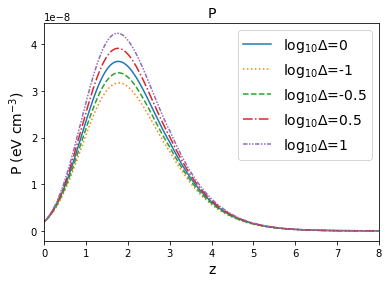

In [10]:
plt.plot(IGM_00.z, P_00_eV, '-', label = '$\mathrm{log_{10}}\Delta$=0')
plt.plot(IGM_neg10.z, P_neg10_eV, ':', label = '$\mathrm{log_{10}}\Delta$=-1')
plt.plot(IGM_neg50.z, P_neg50_eV, '--', label = '$\mathrm{log_{10}}\Delta$=-0.5')
plt.plot(IGM_50.z, P_50_eV, '-.', label = '$\mathrm{log_{10}}\Delta$=0.5')
plt.plot(IGM_10.z, P_10_eV, linestyle = (0, (3, 1, 1, 1, 1, 1)), label = '$\mathrm{log_{10}}\Delta$=1')
plt.legend(loc = 'upper right', fontsize = 14)
plt.title('P', fontsize = 14)
plt.xlabel('z', fontsize = 14)
plt.ylabel('P ($\mathrm{eV\ cm^{-3}}$)', fontsize = 14)
plt.xlim(0, 8)
plt.savefig('P.pdf')
plt.show()

In [11]:
utot_00, E_eV_00 = IGM_00.get_utot()

utot_neg10, E_eV_neg10 = IGM_neg10.get_utot()

utot_neg50, E_eV_neg50 = IGM_neg50.get_utot()

utot_50, E_eV_50 = IGM_50.get_utot()

utot_10, E_eV_10 = IGM_10.get_utot()

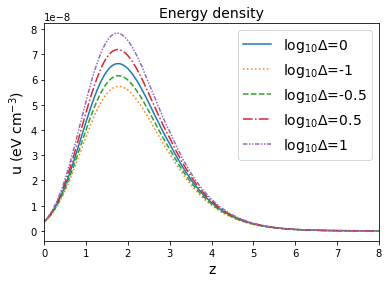

In [12]:
plt.plot(IGM_00.z, utot_00/1.602e-12, '-', label = '$\mathrm{log_{10}}\Delta$=0')
plt.plot(IGM_neg10.z, utot_neg10/1.602e-12, ':', label = '$\mathrm{log_{10}}\Delta$=-1')
plt.plot(IGM_neg50.z, utot_neg50/1.602e-12, '--', label = '$\mathrm{log_{10}}\Delta$=-0.5')
plt.plot(IGM_50.z, utot_50/1.602e-12, '-.', label = '$\mathrm{log_{10}}\Delta$=0.5')
plt.plot(IGM_10.z, utot_10/1.602e-12, linestyle = (0, (3, 1, 1, 1, 1, 1)), label = '$\mathrm{log_{10}}\Delta$=1')
plt.legend(loc = 'upper right', fontsize = 14)
plt.title('Energy density', fontsize = 14)
plt.xlabel('z', fontsize = 14)
plt.ylabel('u ($\mathrm{eV\ cm^{-3}}$)', fontsize = 14)
plt.xlim(0, 8)
plt.savefig('utot.pdf')
plt.show()